# Sales Analysis

#### Import necessary libraries

In [1]:
import pandas as pd

Let us read a single line of data.

We create a variable and call it `path` and store the path to the folder here.
```python
path = './link_to_folder'
```

In [2]:
path = "./Sales_Data"

To read one of the files we do...:
```python
df = pd.read_csv(f"{path}/name_of_file.ext")
df.head()
```

In [3]:
 df = pd.read_csv(f"{path}/Sales_April_2019.csv"); df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Merge data from each month into one CSV

let us check the folder and see how many files we have. We import the os module:
```python
import os
```
We use the list comprehension technique to arrange the files for display by storing them into a variable called `files`:
```python
files = [x for x in os.listdir(path)]
```
Then we use a for loop to print out the file in the variable `files`:
```python
for x in files:
    print(x)
```


In [4]:
import os
files = [file for file in os.listdir(path)]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


We want to cancatenate all the files we have

In [5]:
len(files)

12

seems like we have 12 files, one for each month.

The next cell repeat what we have done in a previous cell but we include another line that makes us no to display hidden files, just as a precaution.
```python
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
```

We then create a variable `all_months_data` and use `pd.DataFrame()` to prepare it to receive a dataframe. Pandas will treat this variable as an empty dataframe.
```python
all_months_data = pd.DataFrame()
```
We use a `for` loop to read the files as dataframes and then concatenate them using `pd.concat`:
```python
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
```

We now save our new dataframe as a single csv file so we do not have to repeat this again:
```python
all_months_data.to_csv("all_data_copy.csv", index=False)
```


In [6]:
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

The next cell shows us how to read the new dataframe and display for us to see.

In [19]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data. However, I will first use the `info` method to see that we are dealing with.

In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


We have 186850 entries but from the column entries we seem to have about 186305 non-null entries which is less than the total entries...meaning we have null values that we can get rid of in the next step.

`any()` function accepts iterable (list, tuple, dictionary etc.) as an argument and return true if any of the element in iterable is true, else it returns false. If iterable is empty then any() method returns false.
```python
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())
```

Next we use `dropna()` to drop all all th rows with null values:
```python
df.dropna(how='all')
```

##### Drop rows of NAN

In [21]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in `'Order Date'` column

We seem to have some non-numeric part that will affect our conversion of some columns to numeric values.

In [22]:
all_data[all_data['Order Date'].str[0:2]=='Or'].sample(12)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
121453,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
140441,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3209,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
115304,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
68741,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
46967,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
81103,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
59524,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
38488,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
153778,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


```python
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
```

the line of code will save a new dataframe into the existing variable name `all_data` without the troublesome 'Or' parts.

In [23]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or'];
all_data.sample(9)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
72894,146317,27in 4K Gaming Monitor,1,389.99,01/05/19 14:06,"596 7th St, Los Angeles, CA 90001"
149087,290224,USB-C Charging Cable,1,11.95,11/01/19 16:05,"310 Spruce St, New York City, NY 10001"
156736,261215,AAA Batteries (4-pack),2,2.99,10/08/19 04:46,"138 4th St, New York City, NY 10001"
28819,246656,iPhone,1,700,08/10/19 18:20,"245 11th St, Los Angeles, CA 90001"
80829,226313,Google Phone,1,600,07/31/19 17:30,"548 Maple St, Los Angeles, CA 90001"
53923,318145,Wired Headphones,1,11.99,12/16/19 22:13,"309 Main St, Boston, MA 02215"
15034,190895,ThinkPad Laptop,1,999.99,04/04/19 16:30,"891 Lincoln St, Los Angeles, CA 90001"
183609,256249,Lightning Charging Cable,1,14.95,09/13/19 16:59,"651 Walnut St, San Francisco, CA 94016"
51328,315665,USB-C Charging Cable,1,11.95,12/08/19 11:23,"552 Forest St, Los Angeles, CA 90001"


#### Make columns correct type

It is time to now convert the columns that are meant to be numeric using `pd.to_numeric` function.

In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
dtypes: object(6)
memory usage: 9.9+ MB


In [25]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


### Augment data with additional columns

Since we are dealing with sheets from a single year, we will create a new column and use the month part of the `'order Date'` column to create the month column

#### Add month column
```python
all_data['Month'] = all_data['Order Date'].str[0:2]
```
The line of code above creates a new column `'Month`' and passes in the first two string values of the `'Order Date'` column as the values of the new column.
```python
all_data['Month'] = all_data['Month'].astype('int32')
```
This next line of code converts the values of the ew column to an integer type
```python
all_data.head()
```
this line of code aims to display out what we have done.

In [27]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


We use the pandas `info` method to see the types we have in our dataframe

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Month               185950 non-null int32
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


#### Add month column (alternative method)

here is an alternate method that I prefer to do the same thing we just did above.
```python
all_data['Month_Number'] = pd.to_datetime(all_data['Order Date']).dt.month
```
we convert the `'Order Date'` to a datetime object using `pd.to_datetime` function then using `dt.month` to select the month option and assigning the values we get to the new column we are creating `'Month 2'`

I will just re-write the column here with the following code:
```python
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month_name(locale = 'English')
```
But in the following cells, I will conver the `'Order Date'` column from a string to a datetime object.

In [18]:
# all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
# all_data.set_index('Order Date', inplace = True)
# all_data.sort_index(ascending=False, inplace=True)
# all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",1
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",1
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",1
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",1
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",1


In [29]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [30]:
all_data['Month_Number'] = all_data['Order Date'].dt.month
all_data['Month'] = all_data['Order Date'].dt.month_name(locale = 'English')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Number
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4


#### Add city column
on the `'Purchase Address'` column, we want to extract the names of the cities.
We will go about creating functions that we couls use the `apply` fucntion to do what we intended the functions to do.
```python
df['column_name'].split(",").strip(" ")
```
The above command will go thru the given column and split the strings there by the comma sign "," and then remove the empty spaces in between the words.

```python
def get_city(address):
    return address.split(",")[1].strip(" ")
```
We can play around with the line of code above and see the results.
```python
string = '669 Spruce St, Los Angeles, CA 90001'
string.split(",")[1].strip(" ")
```
running the above will give us the ouptut:
```python
'Los Angeles'
```

The next function we want to define will be:
```python
def get_state(address):
    return address.split(",")[2].split(" ")[1]
```
and if we play around with it...
```python
string = '669 Spruce St, Los Angeles, CA 90001'
string.split(",")[2].split(" ")[1]
```
running the above will give us the ouptut:
```python
'CA'
```

The final code will be:
```python
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
```

Using my favourite `f-strings` in the `apply` function we want to the city name to come out in the format "Dallas (TX)". Just run the next cell and everything will be clearer.

**I want to reckon that `Regular Expressions` would do this a little better than what we did**

In [31]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Number,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,Los Angeles (CA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

To answer this, we need to create a new column and call it `'Sales'` by getting the product of `'Price Each'` and `'Quantity Ordered'`
```python
df['nu_column'] = df['column_name1'] * df['column_name2']
```

In [32]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Number,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,Los Angeles (CA),11.99


To answer the question posed above, we will use the pandas `groupby` function. What this function will do is to arrange the data by month and calculate the total sales.
```python
all_data.groupby("Month")["Sales"].sum()
```
we will save it into a new variable as a dataframe by passing the `to_frame` function after the code above. We will also reset the index using `reset_index` function.


In [41]:
Monthly_Sales = all_data.groupby(["Month", "Month_Number"])["Sales"].sum().to_frame().sort_values(by=['Month_Number']).reset_index()
Monthly_Sales

,Month,Month_Number,Sales
0,January,1,1.822257e+06
1,February,2,2.202022e+06
2,March,3,2.807100e+06
3,April,4,3.390670e+06
4,May,5,3.152607e+06
5,June,6,2.577802e+06
6,July,7,2.647776e+06
7,August,8,2.244468e+06
8,September,9,2.097560e+06
9,October,10,3.736727e+06


To find the maximum value in a column we use the `max` function. We just want to see which month has the highest sales so we need to print out the row that contains the highest sales in the `Sales` column and we do so using the code in the next cell.

In [50]:
Monthly_Sales[Monthly_Sales['Sales'] == Monthly_Sales['Sales'].max()]

,Month,Month_Number,Sales
11,December,12,4.613443e+06


For us to plot we need the following:
* import the needed libraries
```python
import matplotlib.pyplot as plt
```
* python magic command
```python
%matplotlib inline
```
This line of code makes sure our plot appears on the notebook we are working with. Only works for Jupyter Notebooks
* plot functions
```python
plt.bar(Total_Sales['Month'], Total_Sales['Sales'])
```
This line of code tells matplotlib to plot the `'Month'` column on the `x-axis` and the `'sales'` column on the `y-axis`

```python
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
```
Label names for the axes as indicated.

```python
plt.xticks(Total_Sales['Month'], rotation='vertical', size=15)
```
Ticks are the values used to show specific points on the coordinate axis. It can be a number or a string. Here we are customising it so that the fonts on the `x-axis` is modified to our taste. The parameter `rotation = 'vertical'` is passed to tell it to print the names of the months in a vertical direction; the `size='15'` is a paremeter for the size of the fonts there.

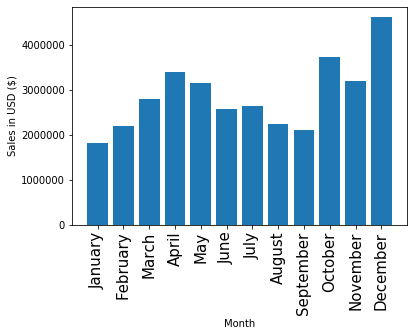

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(Monthly_Sales['Month'], Monthly_Sales['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.xticks(Monthly_Sales['Month'], rotation='vertical', size=15)
plt.show()

#### Question 2: What city sold the most product?

We repeat the same process above but this time using the city not the month

In [44]:
City_Sales = all_data.groupby("City")["Sales"].sum().to_frame().reset_index()
City_Sales

,City,Sales
0,Atlanta (GA),2.795499e+06
1,Austin (TX),1.819582e+06
2,Boston (MA),3.661642e+06
3,Dallas (TX),2.767975e+06
4,Los Angeles (CA),5.452571e+06
5,New York City (NY),4.664317e+06
6,Portland (ME),4.497583e+05
7,Portland (OR),1.870732e+06
8,San Francisco (CA),8.262204e+06
9,Seattle (WA),2.747755e+06


In [45]:
City_Sales[City_Sales['Sales'] == City_Sales['Sales'].max()]

,City,Sales
8,San Francisco (CA),8.262204e+06


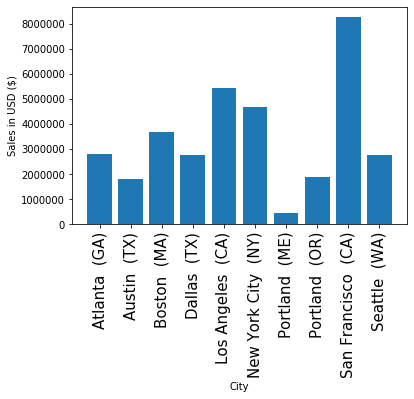

In [46]:
#keys = [city for city in City_Sales['City']]

plt.bar(City_Sales['City'], City_Sales['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(City_Sales['City'], rotation='vertical', size=15)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [49]:
# Add hour column
all_data['Hour'] = all_data['Order Date'].dt.hour

all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Number,City,Sales,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,Dallas (TX),23.90,8,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,Boston (MA),99.99,22,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,Los Angeles (CA),600.00,14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,Los Angeles (CA),11.99,14,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,Los Angeles (CA),11.99,9,1


We repeat the steps taken above but this time we pass the `groupby` function on the `'Hour'` column we have created. However instead of summing the sales we count them instead using the `count` function.

In [60]:
Hourly_Sales = all_data.groupby('Hour')["Sales"].count().to_frame().reset_index()
Hourly_Sales

,Hour,Sales
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


Which hour has the highest transactions? 

In [63]:
Hourly_Sales[Hourly_Sales['Sales'] == Hourly_Sales['Sales'].max()]

,Hour,Sales
19,19,12905


If we wanted to sede the hours with the 4 highest amount of sales we could use the `nlargest` function and pass in paramters that the indicates the number of rows and also the name of the column.

In [64]:
Hourly_Sales.nlargest(4,'Sales')

,Hour,Sales
19,19,12905
12,12,12587
11,11,12411
18,18,12280


We are seeing just one time period. Let us plot a line graph to see the other periods that are close

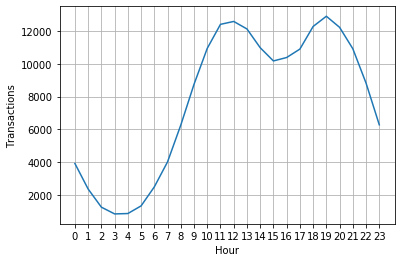

In [66]:
plt.plot(Hourly_Sales['Hour'], Hourly_Sales['Sales'])
plt.ylabel('Transactions')
plt.xlabel('Hour')
plt.xticks(Hourly_Sales['Hour'])
plt.grid()# to show the grid
plt.show()

11 am and 7pm seem to have more traffic.

We could further do it city by city

#### Question 4: What products are most often sold together?

We think that items that have the same order ID were purchased together.
```python
duplicated(keep=False)
```
We will use the above function to group them together based on the ID's. The `keep=False` parameter is passed so that the whole duplicates are kept.

In [69]:
all_data[all_data['Order ID'].duplicated(keep=False)].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Number,City,Sales,Hour,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,Los Angeles (CA),600.00,14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,Los Angeles (CA),11.99,14,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,Los Angeles (CA),600.00,19,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,Los Angeles (CA),11.95,19,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,4,Boston (MA),99.99,11,1


We can see that all the duplicate Order ID numbers were presented (or stacked) together.

We will now create a new dataframe and work from there.

In [70]:
df1 = all_data[all_data['Order ID'].duplicated(keep=False)]

The cell above is more of a repeat of the previous cell.

We will now join all the items that share the same ID on the same line in a new column.
The `join` method takes all items in an iterable and joins them into one string. A string must be specified as the separator.

In [71]:
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Number,City,Sales,Hour,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,Los Angeles (CA),600.00,14,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,Los Angeles (CA),11.99,14,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,Los Angeles (CA),600.00,19,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,Los Angeles (CA),11.95,19,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,4,Boston (MA),99.99,11,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


We seem to have duplicates. So we will create a new dataframe and delete the duplicates.

We will display it in such a way that we only view the colums we are interested in.

In [72]:
df2 = df1[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


We are going to import some tools to help us with the final part of the challenge.
```python
from itertools import combinations
itertools.combinations(iterable, r)
```
`iterable` is the column with the data we want to iterate thru, while `r` is the number of the combinations we are interested in.

If a string is passed to `Counter`, it returns dictionary format, with key/value pair where the key is the element and value is the count. It also considers space as an element and gives the count of spaces in the string.

Generally what we want to do is to iterate through the `Grouped` column and split it by the comma using `split(',')` function and then count the occurrences using the `Counter` function.
```python
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
```

Next we print them out in a format we want.
```python
for key,value in count.most_common(10):
    print(key, value)
```

In [75]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


From the above we can tell the most combinations of items purchased.

**We would go a little further with market basket analysis using and interesting library**

#### What product sold the most? Why do you think it sold the most?

We will use our nifty `groupby` function to find the solution to this problem.

In [76]:
Product_Sales = all_data.groupby('Product')['Quantity Ordered'].sum().to_frame().reset_index()
Product_Sales

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


Just for the heck of it, I want to introduce a rank column and make it the index. The steps are all shown in the cell below. Do yourself a favour and comment out all the contents then remove the comments one after the other and see what each line of code does.

```python
Product_Sales['Quantity Ordered'].rank(ascending=False)
```
The line of code above creates a rank based on the highest value in the `'Quantity Ordered'` column. We then create a new column based on this rankings.
```python
Product_Sales.set_index('Rank', inplace = True)
```
this line of code makes the new column we created above as the index.

```python
Product_Sales.sort_index(inplace = True)
``` 
This line of code then sorts the index so that the dataframe we have will be arranged according to the rank of the items with #1 being the most bought item on our list.

In [90]:
Product_Sales['Rank'] = Product_Sales['Quantity Ordered'].rank(ascending=False)
Product_Sales.set_index('Rank', inplace = True)
Product_Sales.sort_index(inplace = True) ; Product_Sales

,Product,Quantity Ordered
Rank,,
1.0,AAA Batteries (4-pack),31017
2.0,AA Batteries (4-pack),27635
3.0,USB-C Charging Cable,23975
4.0,Lightning Charging Cable,23217
5.0,Wired Headphones,20557
6.0,Apple Airpods Headphones,15661
7.0,Bose SoundSport Headphones,13457
8.0,27in FHD Monitor,7550
9.0,iPhone,6849


In [91]:
Product_Sales[Product_Sales['Quantity Ordered'] == Product_Sales['Quantity Ordered'].max()]

,Product,Quantity Ordered
Rank,,
1.0,AAA Batteries (4-pack),31017


It seems like AAA Batteries are the highest selling. We can check to see the 4 top highest selling products.

In [92]:
Product_Sales.nlargest(4,'Quantity Ordered')

,Product,Quantity Ordered
Rank,,
1.0,AAA Batteries (4-pack),31017
2.0,AA Batteries (4-pack),27635
3.0,USB-C Charging Cable,23975
4.0,Lightning Charging Cable,23217


Let us plot and see how it looks

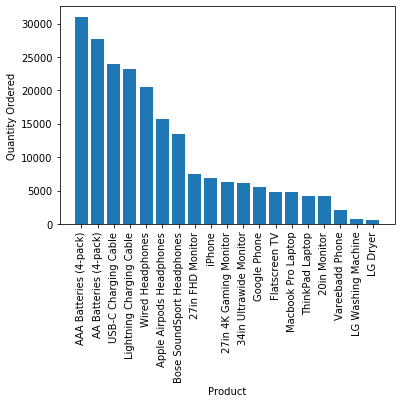

In [94]:
plt.bar(Product_Sales['Product'], Product_Sales['Quantity Ordered'])
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(Product_Sales['Product'], rotation='vertical', size=10)
#plt.grid()# to show the grid
plt.show()

let us do some more work and play around with what we have got. I do not like the way the graph looks too neatly arranged. So I will restart some stuff I did above and I am sure you cam follow along.

I will not sort the index in order on this part.


* We create a new dataframe

In [ ]:
# Product_Sales = all_data.groupby('Product')['Quantity Ordered'].sum().to_frame().reset_index()
# Product_Sales

* We create a new column based on ranking of the column `'Quantity Ordered'`

In [ ]:
# Product_Sales['Rank'] = Product_Sales['Quantity Ordered'].rank(ascending=False)
# Product_Sales

* We set the `'Rank'` column as the index; but we do not sort it out in any order like we did previously.

In [100]:
Product_Sales.set_index('Rank', inplace = True)
Product_Sales

,Product,Quantity Ordered
Rank,,
16.0,20in Monitor,4129
10.0,27in 4K Gaming Monitor,6244
8.0,27in FHD Monitor,7550
11.0,34in Ultrawide Monitor,6199
2.0,AA Batteries (4-pack),27635
1.0,AAA Batteries (4-pack),31017
6.0,Apple Airpods Headphones,15661
7.0,Bose SoundSport Headphones,13457
13.0,Flatscreen TV,4819


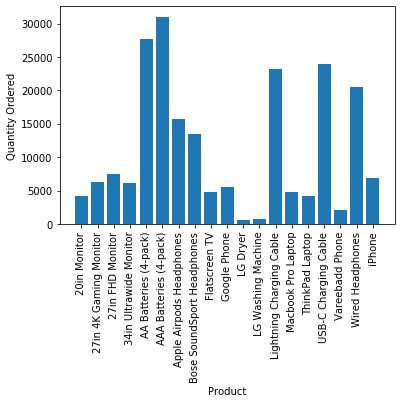

In [101]:
plt.bar(Product_Sales['Product'], Product_Sales['Quantity Ordered'])
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(Product_Sales['Product'], rotation='vertical', size=10)
plt.show()

We want to overlay the prices on the graph too.

We will print out the prices using our nifty `groupby` function and what that would do is to find the average of products that are listed more than once so that the actual price of one is pulled out. I am sure there are other ways to do this but...

In [104]:
Product_Price = all_data.groupby('Product')['Price Each'].mean().to_frame().reset_index()
Product_Price

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


**Merging** two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns. We will merge `Product_Price` and `Product_Sales` but first we need to reset the index so we do not lose the `'Rank'` column after the `merge` on the `Product_Sales` dataframe.

In [111]:
Product_Sales.reset_index(inplace=True)

```python
df1.merge(df2, on='Similar_Column')
```
Is how we do the merging

In [114]:
Product_List = Product_Price.merge(Product_Sales, on='Product')
Product_List.set_index('Rank', inplace = True)
Product_List

,Product,Price Each,Quantity Ordered
Rank,,,
16.0,20in Monitor,109.99,4129
10.0,27in 4K Gaming Monitor,389.99,6244
8.0,27in FHD Monitor,149.99,7550
11.0,34in Ultrawide Monitor,379.99,6199
2.0,AA Batteries (4-pack),3.84,27635
1.0,AAA Batteries (4-pack),2.99,31017
6.0,Apple Airpods Headphones,150.00,15661
7.0,Bose SoundSport Headphones,99.99,13457
13.0,Flatscreen TV,300.00,4819


We will now plot with subplots

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


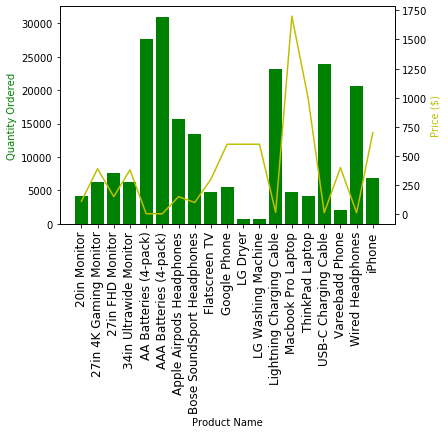

In [119]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(Product_List['Product'], Product_List['Quantity Ordered'], color='g')
ax2.plot(Product_List['Product'], Product_List['Price Each'], color='y')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='y')
ax1.set_xticklabels(Product_List['Product'], rotation='vertical', size=12)

fig.show()

The most commonly purchased products cost about the least.

**This is all for now**